<a href="https://colab.research.google.com/github/rohan472000/India-weather-prediction-Ridge_Regression/blob/main/weather_india_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

dirname = 'drive/My Drive/archive_3/india.csv'
df = pd.read_csv(dirname,index_col='Unnamed: 0')

In [3]:
df.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [4]:
df.apply(pd.isnull).sum()

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

In [5]:
df.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [8]:
df['YEAR']

0      1901
1      1902
2      1903
3      1904
4      1905
       ... 
112    2013
113    2014
114    2015
115    2016
116    2017
Name: YEAR, Length: 117, dtype: int64

In [9]:
# df.index.year

In [10]:
df['YEAR'].value_counts()

1901    1
1975    1
1987    1
1986    1
1985    1
       ..
1936    1
1935    1
1934    1
1933    1
2017    1
Name: YEAR, Length: 117, dtype: int64

In [11]:
df['YEAR'].value_counts().sort_index()

1901    1
1902    1
1903    1
1904    1
1905    1
       ..
2013    1
2014    1
2015    1
2016    1
2017    1
Name: YEAR, Length: 117, dtype: int64

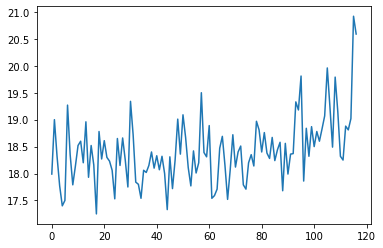

In [12]:
df['JAN'].plot()

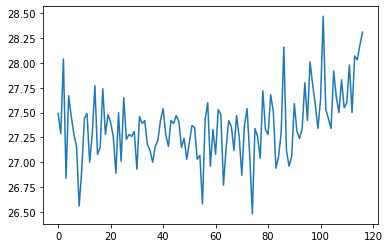

In [13]:
df['JUL'].plot()

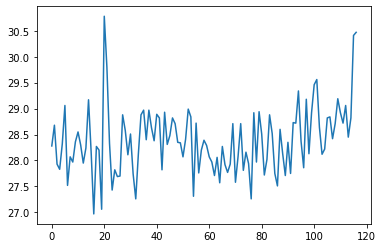

In [14]:
df['MAY'].plot()

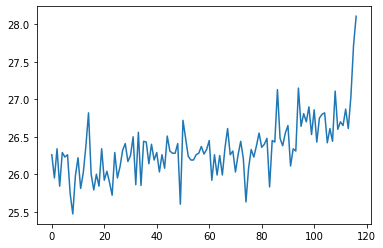

In [15]:
df['SEP'].plot()

In [16]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [17]:
weather = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

In [18]:
# weather1 = df[['maxtempC','mintempC','uvIndex','FeelsLikeC','HeatIndexC','WindChillC','WindGustKmph','cloudcover','humidity','tempC','visibility','winddirDegree','windspeedKmph']]

In [19]:
weather.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [20]:
weather.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [21]:
weather['target'] = weather.shift(-1)['APR']

In [22]:
weather.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,target
0,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,26.54
1,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,26.03
2,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,26.73
3,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,24.84
4,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,26.53


In [23]:
weather.isna().sum()

JAN       0
FEB       0
MAR       0
APR       0
MAY       0
JUN       0
JUL       0
AUG       0
SEP       0
OCT       0
NOV       0
DEC       0
target    1
dtype: int64

In [24]:
weather = weather.ffill()  # to remove above NA value in target column

In [25]:
print(weather.shape[0]) # no. of rows
weather.shape[1] # no. of columns

117


13

In [26]:
weather.isna().sum()

JAN       0
FEB       0
MAR       0
APR       0
MAY       0
JUN       0
JUL       0
AUG       0
SEP       0
OCT       0
NOV       0
DEC       0
target    0
dtype: int64

In [27]:
from sklearn.linear_model import Ridge
MODEL = Ridge(alpha=.1)

In [28]:
weather.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC', 'target'],
      dtype='object')

In [29]:
predictors = weather.columns[~weather.columns.isin(['target'])]

In [30]:
predictors

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [31]:
def backtest(weather,model,predictors,start=40,step=15):
  all_predictions=[]

  for i in range(start,weather.shape[0], step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step),:]
    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index)

    combined = pd.concat([test['target'],preds], axis=1)
    combined.columns = ['actual_val','predicted_val']
    combined['difference'] = (combined['predicted_val'] - combined['actual_val']).abs()

    all_predictions.append(combined)
  return pd.concat(all_predictions) 

In [32]:
predictions = backtest(weather, MODEL, predictors)

In [33]:
predictions

,actual_val,predicted_val,difference
40,26.79,26.656430,0.133570
41,25.56,26.733369,1.173369
42,25.63,26.276505,0.646505
43,25.52,26.821907,1.301907
44,26.86,25.983971,0.876029
...,...,...,...
112,26.91,26.688670,0.221330
113,26.52,27.367668,0.847668
114,29.56,27.187275,2.372725
115,29.17,28.590711,0.579289


In [34]:
from sklearn.metrics import  mean_absolute_error

mean_absolute_error(predictions['actual_val'], predictions['predicted_val'])

0.5314658952828674

In [35]:
predictions.sort_values('difference', ascending=False)

,actual_val,predicted_val,difference
114,29.56,27.187275,2.372725
94,26.67,28.205621,1.535621
108,28.40,26.969988,1.430012
43,25.52,26.821907,1.301907
41,25.56,26.733369,1.173369
...,...,...,...
62,26.82,26.876529,0.056529
96,27.00,26.944504,0.055496
103,26.62,26.673201,0.053201
85,26.59,26.556554,0.033446


In [36]:
predictions['difference'].round().value_counts()

0.0    43
1.0    32
2.0     2
Name: difference, dtype: int64

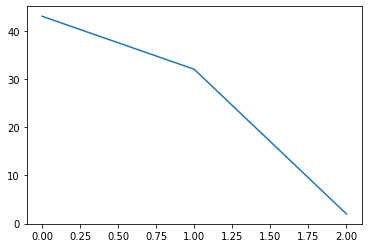

In [37]:
predictions['difference'].round().value_counts().plot()